In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#It's a great dataset for evaluating simple regression models. The dataset is from kaggle. https://www.kaggle.com/harlfoxem/housesalesprediction

In [3]:
house_data = pd.read_csv("kc_house_data.csv")

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
house_data_df = house_data[["sqft_basement", "sqft_living", "yr_built"]]
house_data_df = house_data_df.groupby('yr_built').mean()
house_data_df = house_data_df.reset_index()
house_data_df.head()

,yr_built,sqft_basement,sqft_living
0,1900,244.942529,1732.011494
1,1901,250.000000,1763.620690
2,1902,135.555556,1919.629630
3,1903,104.869565,1507.739130
4,1904,296.000000,1603.177778


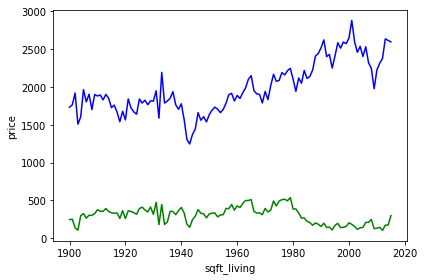

In [42]:
### BEGIN SOLUTION
x = house_data_df.yr_built
y_1 = house_data_df.sqft_living
y_2 = house_data_df.sqft_basement
plt.plot(x, y_1, c='blue')
plt.plot(x, y_2, c='green')
# plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.tight_layout()
### END SOLUTION

# Modeling


## STEP 1. Data Prep

Shape:  (116, 1) (116, 1)


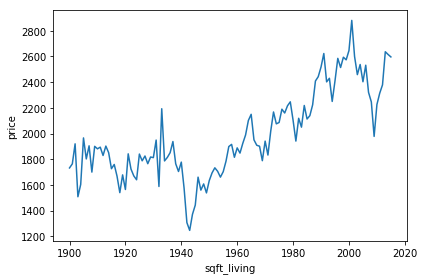

In [43]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = house_data_df.yr_built.values.reshape(-1, 1)
y = house_data_df.sqft_living.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

# Plot the data

### BEGIN SOLUTION

plt.plot(X, y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.tight_layout()
### END SOLUTION

## STEP2 : Modeling: LR

In [44]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression
def model_training(x_column_name, y_column_name):
    ### BEGIN SOLUTION
    X = house_data_df[x_column_name].values.reshape(-1, 1)
    y = house_data_df[y_column_name].values.reshape(-1, 1)
    model = LinearRegression()

    ### END SOLUTION

    # Fit the model to the data. 
    # Note: This is the training step where you fit the line to the data.

    ### BEGIN SOLUTION

    model.fit(X, y)

    ### END SOLUTION

    # Print the coefficient and the intercept for the model

    ### BEGIN SOLUTION
    print('Weight coefficients: ', model.coef_)
    print('y-axis intercept: ', model.intercept_)
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")
    ### END SOLUTION
    # Calculate the y_min and y_max using model.predict and x_min and x_max

    ### BEGIN SOLUTION
    y_min = model.predict(x_min)
    y_max = model.predict(x_max)
    return x_min, x_max, y_min, y_max
    ### END SOLUTION

In [45]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1900]]
Max X Value: [[2015]]


In [46]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

In [47]:

x_living_min, x_living_max, y_living_min, y_living_max = model_training('yr_built', 'sqft_living')
print()
x_basement_min, x_basement_max, y_basement_min, y_basement_max = model_training('yr_built', 'sqft_basement')

Weight coefficients:  [[7.83559764]]
y-axis intercept:  [-13351.70773981]
Min X Value: [[1900]]
Max X Value: [[2015]]

Weight coefficients:  [[-1.14683107]]
y-axis intercept:  [2544.30083966]
Min X Value: [[1900]]
Max X Value: [[2015]]


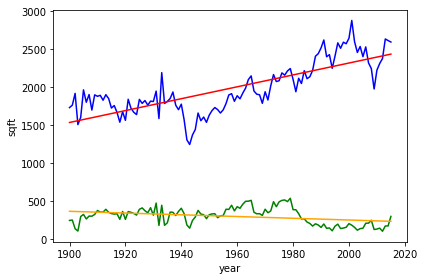

In [51]:
### BEGIN SOLUTION
x = house_data_df.yr_built
y_1 = house_data_df.sqft_living
y_2 = house_data_df.sqft_basement

plt.figure()

# line chart
plt.plot(x, y_1, c='blue')
plt.plot(x, y_2, c='green')

# regression line
plt.plot([x_living_min[0], x_living_max[0]], [y_living_min[0], y_living_max[0]], c='red')
plt.plot([x_basement_min[0], x_basement_max[0]], [y_basement_min[0], y_basement_max[0]], c='orange')

# title

# subtitle


# legend

# label
plt.xlabel('year')
plt.ylabel('sqft')
plt.tight_layout()
### END SOLUTION